# Predict which users will purchase given the user's activities using NN

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
os.getcwd()

'/Users/admin/Downloads/takehome'

In [3]:
os.chdir('/Users/admin/downloads/takehome')

## Read data sets

In [4]:
df = pd.read_csv('training.tsv', header = None, sep='\t', parse_dates = True)
testdt = pd.read_csv('test.tsv', header = None, sep='\t', parse_dates = True)

In [5]:
df = df.rename(columns={0: 'user', 1: 'date', 2:'activity'})
testdt = testdt.rename(columns={0: 'user', 1: 'date', 2:'activity'})

In [6]:
df.head()

,user,date,activity
0,00002acbe042d69,2013-07-11,EmailOpen
1,00002acbe042d69,2013-07-11,FormSubmit
2,00002acbe042d69,2013-07-15,EmailOpen
3,00002acbe042d69,2013-07-17,EmailOpen
4,00002acbe042d69,2013-07-18,EmailOpen


In [7]:
df.shape

(4918677, 3)

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.shape

(4918677, 3)

In [10]:
testdt.head()

,user,date,activity
0,0000ecf58c94668,2015-05-20,EmailOpen
1,0000ecf58c94668,2015-06-11,EmailOpen
2,0000ecf58c94668,2015-06-29,EmailOpen
3,0000ecf58c94668,2015-07-05,EmailOpen
4,0000ecf58c94668,2015-07-29,EmailOpen


In [11]:
testdt.shape

(797759, 3)

In [12]:
testdt.drop_duplicates(inplace=True)

In [13]:
testdt.shape

(797759, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918677 entries, 0 to 4918676
Data columns (total 3 columns):
user        object
date        object
activity    object
dtypes: object(3)
memory usage: 150.1+ MB


In [15]:
isinstance(df.date, datetime.date)

False

In [16]:
df.date = pd.to_datetime(df['date'])
testdt.date = pd.to_datetime(testdt.date)

In [17]:
len(df), len(testdt)

(4918677, 797759)

In [18]:
df.user.value_counts().head()

2cd311cc3ef2d0c    2718
701166975141892    2086
0ec78db2c7be600    1968
01e3f460ec72931    1965
6b784cb0569218a    1828
Name: user, dtype: int64

In [19]:
df.user.value_counts().tail()

7948e53e912092d    1
a1ff0de634e3251    1
30f9e4995db468d    1
0e468c9d1264183    1
daaa6e700d42950    1
Name: user, dtype: int64

In [20]:
df[df.user == '0000ecf58c94668'].sort_values('date').head()

,user,date,activity
30,0000ecf58c94668,2013-10-30,Purchase
31,0000ecf58c94668,2013-11-08,Purchase
32,0000ecf58c94668,2013-12-06,Purchase
33,0000ecf58c94668,2014-02-24,EmailClickthrough
34,0000ecf58c94668,2014-02-24,FormSubmit


## Create features for each user and the outcome

In [21]:
df2 = df.groupby('user')['activity'].value_counts().unstack()

In [22]:
dt2 = testdt.groupby('user')['activity'].value_counts().unstack()

In [23]:
df2.head()

activity,CustomerSupport,EmailClickthrough,EmailOpen,FormSubmit,PageView,Purchase,WebVisit
user,,,,,,,
00002acbe042d69,NaN,NaN,9.0,1.0,NaN,NaN,NaN
0000a3a34bd07e6,NaN,NaN,20.0,NaN,NaN,NaN,NaN
0000ecf58c94668,1.0,1.0,11.0,1.0,NaN,6.0,NaN
00012205dd4613b,NaN,NaN,2.0,NaN,NaN,NaN,NaN
000198d39a568cf,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [24]:
dt2.head()

activity,EmailClickthrough,EmailOpen,FormSubmit,PageView,WebVisit
user,,,,,
0000ecf58c94668,NaN,5.0,NaN,NaN,NaN
000132f21724ee2,1.0,1.0,NaN,NaN,NaN
0001b315b991cf0,NaN,3.0,NaN,NaN,NaN
000269150971d08,NaN,4.0,NaN,NaN,NaN
000297ba4fa5026,NaN,3.0,NaN,NaN,NaN


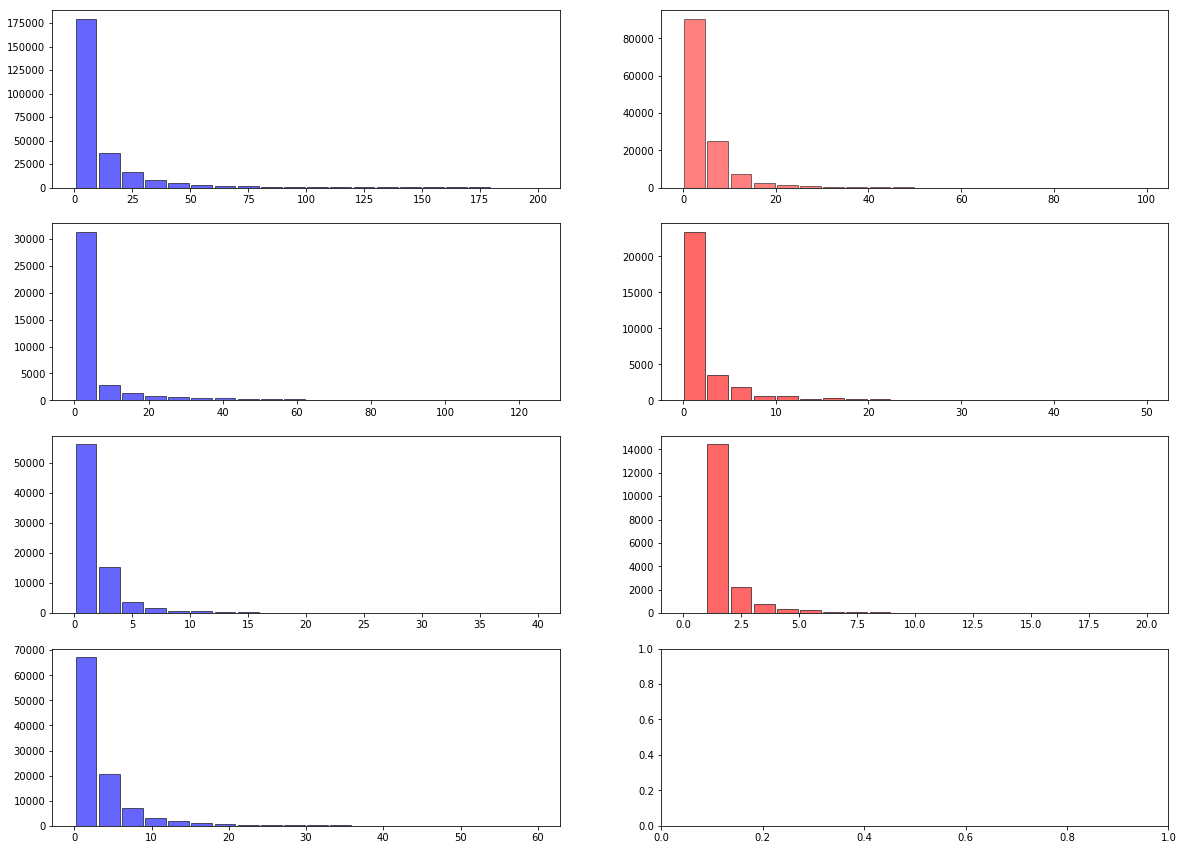

In [25]:
fig, ax = plt.subplots(4, 2, figsize=(20,15))
ax[0,0].hist(df2.EmailOpen.dropna(), alpha = 0.6, bins = 20, range=[0, 200], \
             color = 'blue', rwidth=0.9, edgecolor='black')
ax[0,1].hist(dt2.EmailOpen.dropna(), alpha = 0.5, bins = 20, range=[0, 100], \
             color = 'red', rwidth=0.9, edgecolor='black')
ax[1,0].hist(df2.WebVisit.dropna(), alpha = 0.6, bins = 20, range=[0, 125], \
             color = 'blue', rwidth=0.9, edgecolor='black')
ax[1,1].hist(dt2.WebVisit.dropna(), alpha = 0.6, bins = 20, range=[0, 50], \
             color = 'red', rwidth=0.9, edgecolor='black')
ax[2,0].hist(df2.FormSubmit.dropna(), alpha = 0.6, bins = 20, range=[0, 40], \
             color = 'blue', rwidth=0.9, edgecolor='black')
ax[2,1].hist(dt2.FormSubmit.dropna(), alpha = 0.6, bins = 20, range=[0, 20], \
             color = 'red', rwidth=0.9, edgecolor='black')
ax[3,0].hist(df2.Purchase.dropna(), alpha = 0.6, bins = 20, range=[0, 60], \
             color = 'blue', rwidth=0.9, edgecolor='black')
plt.show()

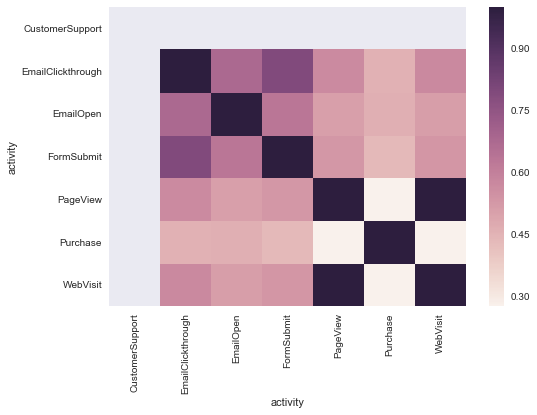

In [26]:
import seaborn as sns
corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Pre-processing

In [27]:
def purch_or_not (row):
    if np.isnan(row['Purchase']):
        return -1
    else:
        return 1

In [28]:
df2['outcome'] = df2.apply(lambda row: purch_or_not (row), axis=1)

## Check outcome column' frequency ratio

In [29]:
pur_y = len(df2.loc[df2['outcome'] == 1])
pur_n = len(df2.loc[df2.outcome == -1])
print(pur_y, pur_n)
print('outcome freq ratio: {}'.format((pur_y/pur_n)*100))

103991 237577
outcome freq ratio: 43.771493031732874


In [30]:
np.dtype(df2.outcome)

dtype('int64')

In [31]:
df2.columns

Index(['CustomerSupport', 'EmailClickthrough', 'EmailOpen', 'FormSubmit',
       'PageView', 'Purchase', 'WebVisit', 'outcome'],
      dtype='object', name='activity')

In [32]:
dt2.columns

Index(['EmailClickthrough', 'EmailOpen', 'FormSubmit', 'PageView', 'WebVisit'], dtype='object', name='activity')

In [33]:
df2 = df2.fillna(0)

In [34]:
dt2 = dt2.fillna(0)

## Test_Train split and standardize

In [35]:
from sklearn.model_selection import train_test_split
feature_cols = ['EmailClickthrough', 'EmailOpen', 'FormSubmit', 'WebVisit']
pred_class = ['outcome']
x = df2[feature_cols].values
y = df2[pred_class].values
split_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = split_size, random_state=42)

dt2 = dt2[['EmailClickthrough', 'EmailOpen', 'FormSubmit', 'WebVisit']]

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
X_test = sc.transform(dt2)

In [37]:
print('train % check: {}'.format((len(x_train)/len(df2.index))*100))

train % check: 69.99982433951658


In [38]:
print('test % check: {}'.format((len(x_test)/len(df2.index))*100))

test % check: 30.000175660483418


In [39]:
x_train

array([[-0.18972962, -0.4058538 , -0.18835064, -0.11343223],
       [-0.18972962, -0.36221523, -0.18835064, -0.11343223],
       [-0.18972962, -0.18766097, -0.18835064, -0.11343223],
       ..., 
       [-0.18972962, -0.36221523, -0.18835064, -0.11343223],
       [-0.18972962, -0.4058538 ,  0.179668  , -0.11343223],
       [-0.18972962, -0.23129953, -0.18835064, -0.11343223]])

## Build and evaluate models

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb_clf = GaussianNB()

In [42]:
nb_clf.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

In [43]:
nb_clf_pred_test = nb_clf.predict(x_test)

from sklearn import metrics

In [44]:
metrics.accuracy_score(y_test, nb_clf_pred_test)

0.70105688438680214

In [45]:
metrics.confusion_matrix(y_test, nb_clf_pred_test)

array([[69171,  1975],
       [28658,  2667]])

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lg_clf = LogisticRegression()
lg_clf.fit(x_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
lg_clf_pred_test = lg_clf.predict(x_test)

In [49]:
metrics.accuracy_score(y_test, lg_clf_pred_test)

0.69917342467624988

### Naive Bayes and Logistic Regression have comparable accuracy...need to test ensamble methods and tune

## RandomForest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [194]:
rf_clf.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [195]:
rf_clf_pred_test = rf_clf.predict(x_test)

## test RF classifier accuracy on training and test datasets:

In [198]:
metrics.accuracy_score(y_train, rf_clf.predict(x_train))

0.91486718779407517

In [199]:
metrics.accuracy_score(y_test, rf_clf_pred_test)

0.88517726966653976

## Check confusion matrix

In [48]:
metrics.confusion_matrix(y_test, rf_clf_pred_test)

array([[69195,  1951],
       [ 9815, 21510]])

## Cross-validation and tuning to make model more generalizable

In [200]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_clf, x_train, y_train.ravel(), cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.00)


# Tuning hyper parameters for optimum classifier

In [201]:
n_estimators_opts = range(10, 300, 50)
rf_paramscores = np.empty([len(n_estimators_opts),2], float)
i = 0
for est in n_estimators_opts:
    rf_clf = RandomForestClassifier(random_state=42, n_estimators=est)
    scores = cross_val_score(rf_clf, x_train, y_train.ravel(), cv=5)
    rf_paramscores[i,0] = scores.mean()
    rf_paramscores[i,1] = est
    i+=1
    print("num estimators: %d, accuracy: %0.2f " % \
              (est, scores.mean()))

num estimators: 10, accuracy: 0.89 
num estimators: 60, accuracy: 0.89 
num estimators: 110, accuracy: 0.89 
num estimators: 160, accuracy: 0.89 
num estimators: 210, accuracy: 0.89 
num estimators: 260, accuracy: 0.89 


In [202]:
g = pd.DataFrame(rf_paramscores)
g

,0,1
0,0.886105,10.0
1,0.887205,60.0
2,0.887247,110.0
3,0.887535,160.0
4,0.887573,210.0
5,0.887594,260.0


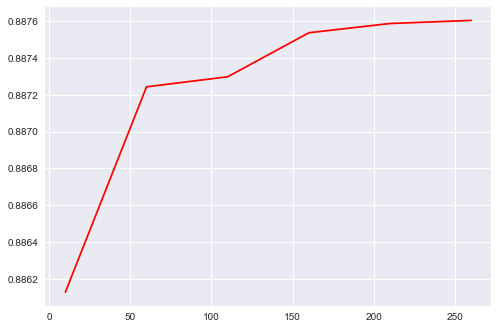

In [78]:
plt.plot(g[1], g[0], color = 'r')
plt.show()

## Selecting number of trees = 110 based on the above chart

In [51]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=110)

In [52]:
rf_clf.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [53]:
fin_pred = rf_clf.predict(X_test)
fin_pred

array([-1, -1, -1, ..., -1, -1, -1])

(array([ 129637.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,    3173.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

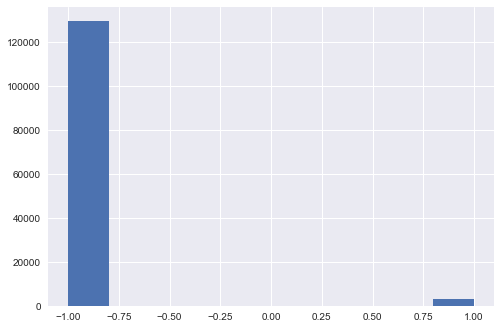

In [54]:
plt.hist(fin_pred)

In [55]:
(len(fin_pred[fin_pred == 1])/len(fin_pred[fin_pred == -1]))*100

2.4476036933900045

## Important feature for prediction

In [56]:
a = zip(feature_cols, rf_clf.feature_importances_)
for x,y in a:
    print(x,':', y)

EmailClickthrough : 0.0898889293712
EmailOpen : 0.656822942688
FormSubmit : 0.192839873786
WebVisit : 0.0604482541542


## 1000 user_id's most likely to convert

In [60]:
fin_pred = pd.Series(fin_pred)
len(fin_pred), len(dt2)

(132810, 132810)

In [73]:
fin_pred = pd.Series(fin_pred)
dt3 = pd.concat([dt2.reset_index(drop=True), fin_pred], axis=1)
dt3
cols = ['EmailClickthrough', 'EmailOpen', 'FormSubmit', 'WebVisit','Purchase_prediction']
dt3.columns = cols
dt3['user_id'] = dt2.index
findt = dt3[['user_id','EmailClickthrough', 'EmailOpen', 'FormSubmit', 'WebVisit','Purchase_prediction']]

findt.head()  #### Final output table with userid's appended back

,user_id,EmailClickthrough,EmailOpen,FormSubmit,WebVisit,Purchase_prediction
0,0000ecf58c94668,0.0,5.0,0.0,0.0,-1
1,000132f21724ee2,1.0,1.0,0.0,0.0,-1
2,0001b315b991cf0,0.0,3.0,0.0,0.0,-1
3,000269150971d08,0.0,4.0,0.0,0.0,-1
4,000297ba4fa5026,0.0,3.0,0.0,0.0,-1


In [74]:
dt4 = findt[findt.Purchase_prediction == 1]
dt4.head()

,user_id,EmailClickthrough,EmailOpen,FormSubmit,WebVisit,Purchase_prediction
97,0028014833edb65,0.0,23.0,0.0,14.0,1
140,003c7b61cecaf93,2.0,9.0,0.0,4.0,1
161,004838799d48cc3,0.0,17.0,1.0,6.0,1
170,004d19233e453e1,2.0,19.0,0.0,27.0,1
246,006f0efffdd891b,5.0,37.0,4.0,16.0,1


In [76]:
dt5 = dt4.sort_values(['EmailOpen', 'FormSubmit'], ascending = [False, False])
dt6 = dt5.head(1000)
top1k_likly_cust = dt6.to_csv('top_1k_likly_customers.csv')

## Notes:
1. Due to time constraints I did not evaluate a time dependent x activity based model for future purchase probability 
2. I spent some time trying out a 3 layer MLP classifier from neural_network library of SciKit-Learn. However, performance was really compromised with diminishing gains. An accuracy improvment of ~1.1 pct was achieved over 1 hour of computing.
3. SVM classifier would take forever to converege with len(df) > 50K. 
4. Future work recommendation is to include datetime features in the model such as year and month or maybe even week and evaluate the performance for a seasonality implication.

---

In [23]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,user,date,activity,year,month
0,00002acbe042d69,2013-07-11,EmailOpen,2013,7
1,00002acbe042d69,2013-07-11,FormSubmit,2013,7
2,00002acbe042d69,2013-07-15,EmailOpen,2013,7
3,00002acbe042d69,2013-07-17,EmailOpen,2013,7
4,00002acbe042d69,2013-07-18,EmailOpen,2013,7


In [33]:
ftbl = df.groupby(['user','month'])['activity'].value_counts().unstack().unstack()
ftbl.fillna(0).head()

activity        CustomerSupport                                               \
month                        1    2    3    4    5    6    7    8    9    10   
user                                                                           
00002acbe042d69             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0000a3a34bd07e6             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0000ecf58c94668             0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
00012205dd4613b             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
000198d39a568cf             1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

activity        ...  WebVisit                                               
month           ...        3    4    5    6    7    8    9    10   11   12  
user            ...                                                         
00002acbe042d69 ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0000a3a34bd07e6 ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0000ecf58c94668 ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
00012205dd4613b ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
000198d39a568cf ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 84 columns]

In [184]:
ftbl.head()

month        \
                  sum count   
user                          
00002acbe042d69    73    10   
0000a3a34bd07e6   132    20   
0000ecf58c94668   117    20   
00012205dd4613b    20     2   
000198d39a568cf     2     2   

                                                          activity        
                                                               sum count  
user                                                                      
00002acbe042d69  EmailOpenFormSubmitEmailOpenEmailOpenEmailOpen...    10  
0000a3a34bd07e6  EmailOpenEmailOpenEmailOpenEmailOpenEmailOpenE...    20  
0000ecf58c94668  PurchasePurchasePurchaseEmailClickthroughFormS...    20  
00012205dd4613b                                 EmailOpenEmailOpen     2  
000198d39a568cf                            PurchaseCustomerSupport     2

In [158]:
tbl = df.groupby(['user','month'])['activity'].value_counts().unstack().unstack()

In [171]:
pd.DataFrame(tbl).fillna(0).head()

activity        CustomerSupport                                               \
month                        1    2    3    4    5    6    7    8    9    10   
user                                                                           
00002acbe042d69             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0000a3a34bd07e6             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0000ecf58c94668             0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
00012205dd4613b             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
000198d39a568cf             1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

activity        ...  WebVisit                                               
month           ...        3    4    5    6    7    8    9    10   11   12  
user            ...                                                         
00002acbe042d69 ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0000a3a34bd07e6 ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0000ecf58c94668 ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
00012205dd4613b ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
000198d39a568cf ...       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 84 columns]

In [145]:
tbl.head(30)

activity               CustomerSupport  EmailClickthrough  EmailOpen  \
user            month                                                  
00002acbe042d69 7                  NaN                NaN        6.0   
                8                  NaN                NaN        3.0   
0000a3a34bd07e6 2                  NaN                NaN        3.0   
                3                  NaN                NaN        4.0   
                4                  NaN                NaN        1.0   
                5                  NaN                NaN        1.0   
                6                  NaN                NaN        1.0   
                7                  NaN                NaN        2.0   
                8                  NaN                NaN        1.0   
                10                 NaN                NaN        1.0   
                11                 NaN                NaN        5.0   
                12                 NaN                NaN        1.0   
0000ecf58c94668 1                  NaN                NaN        2.0   
                2                  NaN                1.0        2.0   
                3                  NaN                NaN        2.0   
                4                  NaN                NaN        NaN   
                5                  NaN                NaN        NaN   
                6                  NaN                NaN        1.0   
                7                  1.0                NaN        1.0   
                10                 NaN                NaN        1.0   
                11                 NaN                NaN        2.0   
                12                 NaN                NaN        NaN   
00012205dd4613b 10                 NaN                NaN        2.0   
000198d39a568cf 1                  1.0                NaN        NaN   
0001b315b991cf0 4                  NaN                NaN        1.0   
00022618457fcf2 7                  NaN                NaN        NaN   
                8                  1.0                NaN        NaN   
000256826de4432 10                 1.0                NaN        NaN   
000269150971d08 3                  NaN                NaN        2.0   
                4                  NaN                NaN        1.0   

activity               FormSubmit  PageView  Purchase  WebVisit  
user            month                                            
00002acbe042d69 7             1.0       NaN       NaN       NaN  
                8             NaN       NaN       NaN       NaN  
0000a3a34bd07e6 2             NaN       NaN       NaN       NaN  
                3             NaN       NaN       NaN       NaN  
                4             NaN       NaN       NaN       NaN  
                5             NaN       NaN       NaN       NaN  
                6             NaN       NaN       NaN       NaN  
                7             NaN       NaN       NaN       NaN  
                8             NaN       NaN       NaN       NaN  
                10            NaN       NaN       NaN       NaN  
                11            NaN       NaN       NaN       NaN  
                12            NaN       NaN       NaN       NaN  
0000ecf58c94668 1             NaN       NaN       NaN       NaN  
                2             1.0       NaN       NaN       NaN  
                3             NaN       NaN       NaN       NaN  
                4             NaN       NaN       1.0       NaN  
                5             NaN       NaN       1.0       NaN  
                6             NaN       NaN       NaN       NaN  
                7             NaN       NaN       1.0       NaN  
                10            NaN       NaN       1.0       NaN  
                11            NaN       NaN       1.0       NaN  
                12            NaN       NaN       1.0       NaN  
00012205dd4613b 10            NaN       NaN       NaN       NaN  
000198d39a568cf 1             NaN       NaN  